In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()
#I select the geyser dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [111]:
geyser=sns.load_dataset('geyser')
geyser.head(10)
#There are 3 columns 1 float, 1 integer and 1 categoric

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
5,2.883,55,short
6,4.700,88,long
7,3.600,85,long
8,1.950,51,short
9,4.350,85,long


In [112]:
#DataFrame. DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
#It is generally the most commonly used pandas object.
geyser_df = pd.DataFrame(geyser)
geyser_df.columns = columns

In [113]:
geyser_df.isnull().sum()
#There are no null values

duration    0
waiting     0
kind        0
dtype: int64

<AxesSubplot:xlabel='duration'>

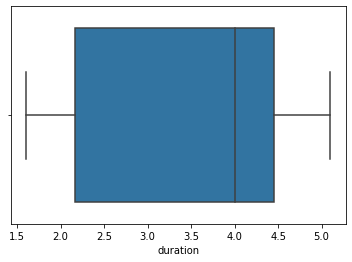

In [114]:
#Let's check outliers
sns.boxplot(x=geyser_df['duration'])

<AxesSubplot:xlabel='waiting'>

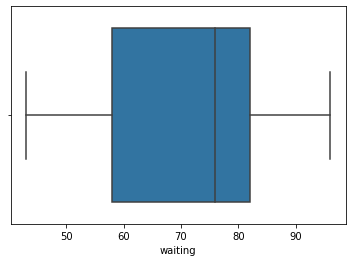

In [115]:
sns.boxplot(x=geyser_df['waiting'])

In [116]:
#No outliers
#Let's encode the categorical values
#One-Hot for non ordinal categorical values
#Ordinal encoding for ordinal categorical values
#One-hot vs Dummy encoding
#One hot creates k numbers, dummy creates k-1 numbers
#Where k is the amount of categorical number of values

In [117]:
s = pd.Series(geyser_df['kind'])
encoded=pd.get_dummies(s)
print(encoded)

     long  short
0       1      0
1       0      1
2       1      0
3       0      1
4       1      0
..    ...    ...
267     1      0
268     0      1
269     1      0
270     0      1
271     1      0

[272 rows x 2 columns]


In [118]:
#Now we will delete kind column, and add our encoded long column
#We are adding only the long column because adding 2 columns that are about
#the same thing affects doubles the result
del geyser_df['kind']
geyser_df['long']=encoded['long']

In [119]:
#Let's change column name long to kind
geyser_df= geyser_df.rename(columns={"long": "kind"})
geyser_df

,duration,waiting,kind
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1
...,...,...,...
267,4.117,81,1
268,2.150,46,0
269,4.417,90,1
270,1.817,46,0


In [120]:
from sklearn.model_selection import train_test_split
# Veri seti öncelikle train ve test olarak ikiye ayrılıyor
x_train, x_test, y_train, y_test = train_test_split(geyser_df, # independent variables
                                                    geyser_df['waiting'], # target
                                                    test_size = 0.2, # test set percentile
                                                    shuffle = False, # shuffless rows vertically
                                                    random_state = None)

# Train dataset split (%25) validation from itself 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.25,
                                                  shuffle = False)
# All datasets
all = {"x train" : x_train,
       "x validation" : x_val,
       "x test" : x_test,
       "y train" : y_train,
       "y validation": y_val,
       "y test": y_test}

# Features of datasets
for i in all:
    print(f"{i} number of rows: {len(all.get(i))}")

x train number of rows: 162
x validation number of rows: 55
x test number of rows: 55
y train number of rows: 162
y validation number of rows: 55
y test number of rows: 55


In [121]:
#METRIC
#I will choose RMSE because there are no outliers(RMSLE) or no punishment intend
import math

In [122]:
#MODELS

In [123]:
#DO NOT forget our dataset is very small so less learning algorithms
#will succed and more complex models will fail.
#If the RMSE metric solution is below 1 I will call it an overfit.

In [124]:
#LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#It is overfitted why?

Root Mean Squared Error: 7.842350716216406e-15
     Actual  Predicted
217      94       94.0
218      55       55.0
219      76       76.0
220      50       50.0
221      82       82.0
222      54       54.0
223      75       75.0
224      78       78.0
225      79       79.0
226      78       78.0


In [125]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs', max_iter=250)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#(Warning)It stops because total number of iterations reaches to the limit
#Solution is pretty close, not bad

Root Mean Squared Error: 3.222082894932745
     Actual  Predicted
217      94         90
218      55         59
219      76         78
220      50         53
221      82         81
222      54         59
223      75         77
224      78         78
225      79         81
226      78         78


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
#DecisionTree
from sklearn import tree
regressor = tree.DecisionTreeClassifier()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#It nearly guesses all correct which might be a sign for overfitting
#Also trees tend to overfit

Root Mean Squared Error: 0.4861724348043977
     Actual  Predicted
217      94         92
218      55         55
219      76         76
220      50         50
221      82         82
222      54         54
223      75         75
224      78         78
225      79         79
226      78         78


In [127]:
#SVM
from sklearn import svm
regressor = svm.SVC()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#It is close too, worse than logistic regression but not a overfit

Root Mean Squared Error: 6.448396558976361
     Actual  Predicted
217      94         82
218      55         59
219      76         81
220      50         59
221      82         82
222      54         59
223      75         81
224      78         81
225      79         81
226      78         81


In [128]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#It looks like an another overfit

Root Mean Squared Error: 0.3813850356982369
     Actual  Predicted
217      94         93
218      55         55
219      76         76
220      50         50
221      82         82
222      54         54
223      75         75
224      78         78
225      79         79
226      78         78


In [129]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier(n_neighbors=3)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#Overfit

Root Mean Squared Error: 0.5559594491425693
     Actual  Predicted
217      94         92
218      55         55
219      76         76
220      50         50
221      82         82
222      54         54
223      75         75
224      78         78
225      79         79
226      78         78


In [130]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(max_depth=2, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)
print(df.head(10))
#Scores pretty good

Root Mean Squared Error: 3.534248023400323
     Actual  Predicted
217      94         90
218      55         59
219      76         78
220      50         51
221      82         82
222      54         59
223      75         78
224      78         78
225      79         78
226      78         78


In [131]:
print("Result:Logistic Regression>Random Forest>SVM>Linear Regression")
print("These are overfitted:KNN, Naive Bayes, Decision Tree")

Result:Logistic Regression>Random Forest>SVM>Linear Regression
These are overfitted:KNN, Naive Bayes, Decision Tree
